# Energy Behavior of Prosumers 

Data is based on data from Kaggle competition: [Enefit - Predict Energy Behavior of Prosumers](https://www.kaggle.com/competitions/predict-energy-behavior-of-prosumers).

However, to decrease the size of the dataset we limit the data to only **one district in Estonia**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

- **county** - An ID code for the county.
- **is_business** - Boolean for whether or not the prosumer is a business.
- **product_type** - ID code with the following mapping of codes to contract types: {0: 'Combined', 1: 'Fixed', 2: 'General service', 3: 'Spot'}.
- **target** - The consumption or production amount for the relevant segment for the hour. The segments are defined by the county, is_business, and product_type.
- **is_consumption** - Boolean for whether or not this row's target is consumption or production.

In [2]:
data_file = 'data.csv'

In [3]:
df = pd.read_csv(data_file)

In [8]:
df

,county,is_business,product_type,is_consumption,lowest_price_per_mwh,highest_price_per_mwh,eic_count,installed_capacity,euros_per_mwh,hours_ahead,...,year,segment,sin(dayofyear),cos(dayofyear),sin(hour),cos(hour),target,target_mean,target_std,target_ratio
0,6,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2021,6_1_3_0,-0.866025,-0.500000,0.000000,1.000000,0.000,NaN,NaN,NaN
1,6,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,...,2021,6_1_3_1,-0.866025,-0.500000,0.000000,1.000000,115.243,NaN,NaN,NaN
2,6,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2021,6_1_3_0,-0.866025,-0.500000,0.258819,0.965926,0.000,NaN,NaN,NaN
3,6,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,...,2021,6_1_3_1,-0.866025,-0.500000,0.258819,0.965926,125.407,NaN,NaN,NaN
4,6,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2021,6_1_3_0,-0.866025,-0.500000,0.500000,0.866025,0.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30611,6,1,3,1,29.0,34.0,17.0,540.0,82.10,43.0,...,2023,6_1_3_1,0.522133,-0.852864,-0.707107,0.707107,132.470,110.447170,37.930020,0.901355
30612,6,1,3,0,29.0,34.0,17.0,540.0,82.09,44.0,...,2023,6_1_3_0,0.522133,-0.852864,-0.500000,0.866025,0.002,0.003167,0.001941,3.000000
30613,6,1,3,1,29.0,34.0,17.0,540.0,82.09,44.0,...,2023,6_1_3_1,0.522133,-0.852864,-0.500000,0.866025,114.667,98.548500,22.470007,0.756723
30614,6,1,3,0,29.0,34.0,17.0,540.0,-1.29,45.0,...,2023,6_1_3_0,0.522133,-0.852864,-0.258819,0.965926,0.000,0.002667,0.001751,4.000000


In [9]:
df.head(8).T.head(20)

,0,1,2,3,4,5,6,7
county,6,6,6,6,6,6,6,6
is_business,1,1,1,1,1,1,1,1
product_type,3,3,3,3,3,3,3,3
is_consumption,0,1,0,1,0,1,0,1
lowest_price_per_mwh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
highest_price_per_mwh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eic_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installed_capacity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
euros_per_mwh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours_ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.head(8).T.tail(20)

,0,1,2,3,4,5,6,7
target_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target_1_all_type_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target_2_all_type_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target_6_all_type_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target_7_all_type_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1,1,1,1,1,1,1,1
weekday,3,3,3,3,3,3,3,3
month,9,9,9,9,9,9,9,9


In [11]:
df.groupby(['year','month','eic_count']).target.count()

year  month  eic_count
2021  9      6.0          1344
      10     6.0          1486
      11     6.0          1440
      12     6.0          1488
2022  1      6.0          1488
      2      6.0          1344
      3      6.0          1486
      4      6.0          1440
      5      6.0          1488
      6      6.0            96
             7.0          1344
      7      7.0            96
             8.0          1392
      8      8.0            96
             11.0         1392
      9      11.0           96
             12.0         1344
      10     12.0           96
             15.0         1390
      11     15.0           96
             18.0         1344
      12     18.0         1488
2023  1      18.0           96
             21.0         1392
      2      21.0         1344
      3      16.0          622
             17.0          768
             21.0           96
      4      16.0         1440
      5      16.0           96
             17.0         1392
Name: target, dt

In [12]:
df.tail(8).T.head(20)

,30608,30609,30610,30611,30612,30613,30614,30615
county,6,6,6,6,6,6,6,6
is_business,1,1,1,1,1,1,1,1
product_type,3,3,3,3,3,3,3,3
is_consumption,0,1,0,1,0,1,0,1
lowest_price_per_mwh,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
highest_price_per_mwh,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0
eic_count,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
installed_capacity,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0
euros_per_mwh,150.85,150.85,82.1,82.1,82.09,82.09,-1.29,-1.29
hours_ahead,42.0,42.0,43.0,43.0,44.0,44.0,45.0,45.0


In [13]:
df.describe().T.head(20)

,count,mean,std,min,25%,50%,75%,max
county,30616.0,6.000000,0.000000,6.000000,6.000000,6.000000,6.000000,6.000000
is_business,30616.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
product_type,30616.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000
is_consumption,30616.0,0.500000,0.500008,0.000000,0.000000,0.500000,1.000000,1.000000
lowest_price_per_mwh,30568.0,95.043430,47.519296,28.100000,60.000000,85.210000,109.000000,250.000000
highest_price_per_mwh,30568.0,107.761765,54.705051,34.000000,67.530000,93.470000,130.740000,305.000000
eic_count,30520.0,11.138467,5.570282,6.000000,6.000000,8.000000,17.000000,21.000000
installed_capacity,30520.0,465.133047,153.600854,324.200000,324.200000,388.700000,572.200000,771.700000
euros_per_mwh,30564.0,157.102990,121.138700,-10.060000,85.290000,128.295000,199.800000,4000.000000
hours_ahead,30564.0,36.000589,6.492352,24.000000,31.000000,36.000000,41.000000,47.000000


In [14]:
df.groupby(['installed_capacity', 'is_business']).target.count()

installed_capacity  is_business
324.2               1              11612
330.2               1               1488
338.7               1               1440
388.7               1               1488
505.2               1               1486
538.7               1               1488
540.0               1               1392
549.2               1               1440
569.7               1                718
572.2               1               1440
614.7               1                768
645.2               1               2928
771.2               1               1488
771.7               1               1344
Name: target, dtype: int64

In [15]:
df.groupby('installed_capacity').year.min()

installed_capacity
324.2    2021
330.2    2022
338.7    2022
388.7    2022
505.2    2022
538.7    2022
540.0    2023
549.2    2022
569.7    2023
572.2    2023
614.7    2023
645.2    2022
771.2    2023
771.7    2023
Name: year, dtype: int64

In [16]:
df.groupby(['eic_count','installed_capacity']).target.count()

eic_count  installed_capacity
6.0        324.2                 11612
           330.2                  1488
7.0        338.7                  1440
8.0        388.7                  1488
11.0       538.7                  1488
12.0       549.2                  1440
15.0       505.2                  1486
16.0       569.7                   718
           572.2                  1440
17.0       540.0                  1392
           614.7                   768
18.0       645.2                  2928
21.0       771.2                  1488
           771.7                  1344
Name: target, dtype: int64

In [17]:
list(df.columns)

['county',
 'is_business',
 'product_type',
 'is_consumption',
 'lowest_price_per_mwh',
 'highest_price_per_mwh',
 'eic_count',
 'installed_capacity',
 'euros_per_mwh',
 'hours_ahead',
 'temperature',
 'dewpoint',
 'cloudcover_high',
 'cloudcover_low',
 'cloudcover_mid',
 'cloudcover_total',
 '10_metre_u_wind_component',
 '10_metre_v_wind_component',
 'direct_solar_radiation',
 'surface_solar_radiation_downwards',
 'snowfall',
 'total_precipitation',
 'hours_ahead_fl',
 'temperature_fl',
 'dewpoint_fl',
 'cloudcover_high_fl',
 'cloudcover_low_fl',
 'cloudcover_mid_fl',
 'cloudcover_total_fl',
 '10_metre_u_wind_component_fl',
 '10_metre_v_wind_component_fl',
 'direct_solar_radiation_fl',
 'surface_solar_radiation_downwards_fl',
 'snowfall_fl',
 'total_precipitation_fl',
 'hours_ahead_fd_7d',
 'temperature_fd_7d',
 'dewpoint_fd_7d',
 'cloudcover_high_fd_7d',
 'cloudcover_low_fd_7d',
 'cloudcover_mid_fd_7d',
 'cloudcover_total_fd_7d',
 '10_metre_u_wind_component_fd_7d',
 '10_metre_v_wind_

In [18]:
df.describe().T.head(9)

,count,mean,std,min,25%,50%,75%,max
county,30616.0,6.000000,0.000000,6.00,6.00,6.000,6.00,6.0
is_business,30616.0,1.000000,0.000000,1.00,1.00,1.000,1.00,1.0
product_type,30616.0,3.000000,0.000000,3.00,3.00,3.000,3.00,3.0
is_consumption,30616.0,0.500000,0.500008,0.00,0.00,0.500,1.00,1.0
lowest_price_per_mwh,30568.0,95.043430,47.519296,28.10,60.00,85.210,109.00,250.0
highest_price_per_mwh,30568.0,107.761765,54.705051,34.00,67.53,93.470,130.74,305.0
eic_count,30520.0,11.138467,5.570282,6.00,6.00,8.000,17.00,21.0
installed_capacity,30520.0,465.133047,153.600854,324.20,324.20,388.700,572.20,771.7
euros_per_mwh,30564.0,157.102990,121.138700,-10.06,85.29,128.295,199.80,4000.0


In [19]:
df.loc[(df.is_consumption==1)&(df['sin(hour)']==-8.660254e-01)&(df['cos(hour)']==0.5)][['year','month','day','sin(hour)','cos(hour)',
    'target','target_1','target_2','target_3','target_1_all_type_sum','target_2_all_type_sum']].tail(28)

,year,month,day,sin(hour),cos(hour),target,target_1,target_2,target_3,target_1_all_type_sum,target_2_all_type_sum
29313,2023,5,4,-0.866025,0.5,174.097,161.770,114.790,98.748,161.770,114.790
29361,2023,5,5,-0.866025,0.5,188.942,171.224,161.770,114.790,171.224,161.770
29409,2023,5,6,-0.866025,0.5,72.547,174.097,171.224,161.770,174.097,171.224
29457,2023,5,7,-0.866025,0.5,79.163,188.942,174.097,171.224,188.942,174.097
29505,2023,5,8,-0.866025,0.5,143.493,72.547,188.942,174.097,72.547,188.942
29553,2023,5,9,-0.866025,0.5,122.515,79.163,72.547,188.942,79.163,72.547
29601,2023,5,10,-0.866025,0.5,132.415,143.493,79.163,72.547,143.493,79.163
29649,2023,5,11,-0.866025,0.5,140.337,122.515,143.493,79.163,122.515,143.493
29697,2023,5,12,-0.866025,0.5,131.597,132.415,122.515,143.493,132.415,122.515
29745,2023,5,13,-0.866025,0.5,54.855,140.337,132.415,122.515,140.337,132.415


target_1 = target(laged 2 days)

In [60]:
inlcuded_fields = [
'is_consumption',
'eic_count',
'installed_capacity',
'day',
'weekday',
'month',
'year',
'sin(dayofyear)',
'cos(dayofyear)',
'sin(hour)',
'cos(hour)',
'target'
]

In [61]:
data = df[inlcuded_fields]

In [62]:
data

,is_consumption,eic_count,installed_capacity,day,weekday,month,year,sin(dayofyear),cos(dayofyear),sin(hour),cos(hour),target
0,0,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.000000,1.000000,0.000
1,1,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.000000,1.000000,115.243
2,0,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.258819,0.965926,0.000
3,1,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.258819,0.965926,125.407
4,0,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.500000,0.866025,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
30611,1,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.707107,0.707107,132.470
30612,0,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,0.866025,0.002
30613,1,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,0.866025,114.667
30614,0,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.258819,0.965926,0.000


In [48]:
data.loc[:,'date'] = pd.to_datetime(dict(year=df.loc[:,"year"], month=df.loc[:,"month"], day=df.loc[:,"day"]))

/tmp/ipykernel_8063/3550745815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'date'] = pd.to_datetime(dict(year=df.loc[:,"year"], month=df.loc[:,"month"], day=df.loc[:,"day"]))


In [49]:
data

,is_consumption,eic_count,installed_capacity,day,weekday,month,year,sin(dayofyear),cos(dayofyear),sin(hour),cos(hour),target,date
0,0,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.000000,1.000000,0.000,2021-09-01
1,1,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.000000,1.000000,115.243,2021-09-01
2,0,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.258819,0.965926,0.000,2021-09-01
3,1,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.258819,0.965926,125.407,2021-09-01
4,0,NaN,NaN,1,3,9,2021,-0.866025,-0.500000,0.500000,0.866025,0.000,2021-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30611,1,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.707107,0.707107,132.470,2023-05-31
30612,0,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,0.866025,0.002,2023-05-31
30613,1,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,0.866025,114.667,2023-05-31
30614,0,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.258819,0.965926,0.000,2023-05-31


In [50]:
data.loc[:,"production_per_cap_unit"] = data["target"] / data["installed_capacity"]

/tmp/ipykernel_8063/2510659958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,"production_per_cap_unit"] = data["target"] / data["installed_capacity"]


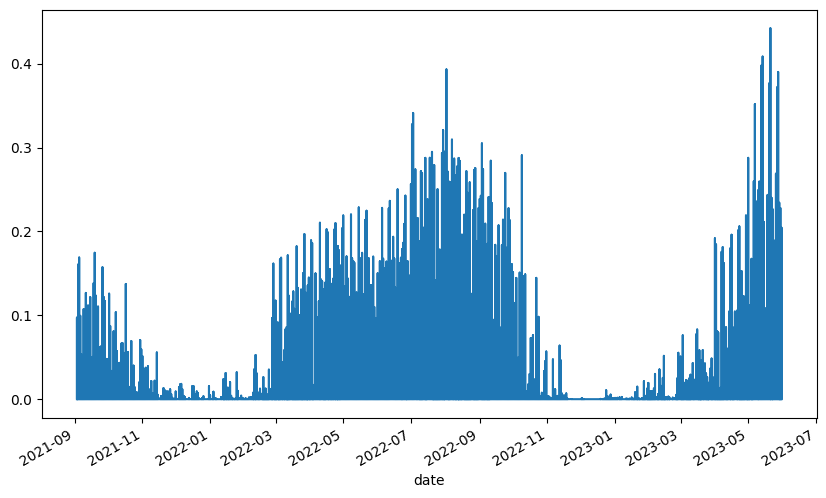

In [51]:
data.loc[data.is_consumption==0].set_index("date").production_per_cap_unit.plot(figsize=(10,6));

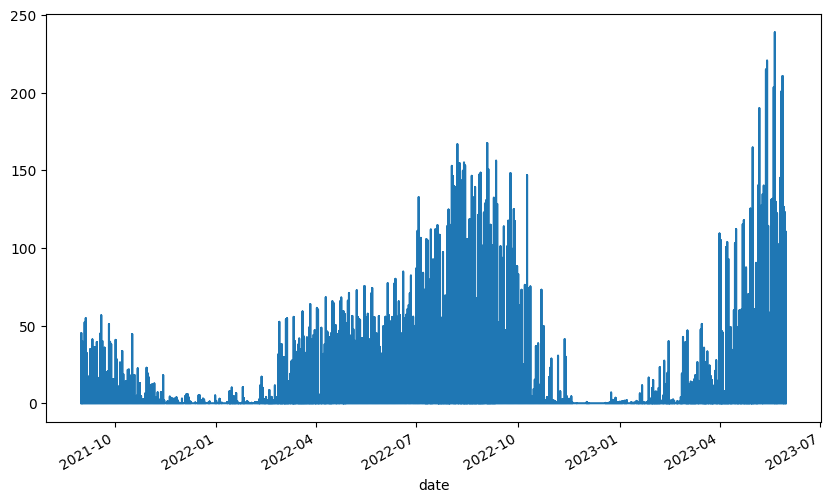

In [52]:
data.loc[data.is_consumption==0].set_index("date").target.plot(figsize=(10,6));

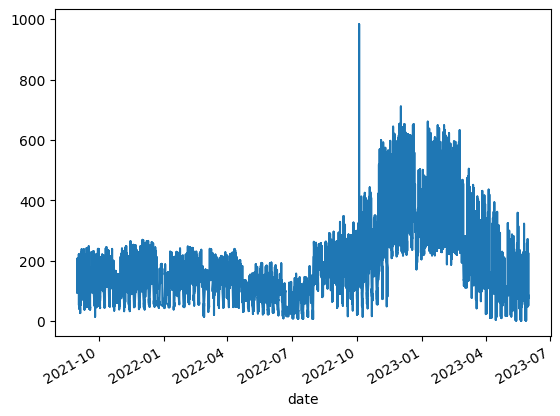

In [53]:
data.loc[data.is_consumption==1].set_index("date").target.plot();

### Missing values

In [63]:
data.isnull().sum()

is_consumption         0
eic_count             96
installed_capacity    96
day                    0
weekday                0
month                  0
year                   0
sin(dayofyear)         0
cos(dayofyear)         0
sin(hour)              0
cos(hour)              0
target                 0
dtype: int64

In [64]:
data.isna().sum()

is_consumption         0
eic_count             96
installed_capacity    96
day                    0
weekday                0
month                  0
year                   0
sin(dayofyear)         0
cos(dayofyear)         0
sin(hour)              0
cos(hour)              0
target                 0
dtype: int64

In [65]:
data.shape

(30616, 12)

#### Handling missing values: exclude

In [66]:
data = data.loc[~data.isna().any(axis=1)].reset_index(drop=True)

In [67]:
data

,is_consumption,eic_count,installed_capacity,day,weekday,month,year,sin(dayofyear),cos(dayofyear),sin(hour),cos(hour),target
0,0,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.000000,1.000000,0.000
1,1,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.000000,1.000000,136.281
2,0,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.258819,0.965926,0.000
3,1,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.258819,0.965926,145.417
4,0,6.0,324.2,3,5,9,2021,-0.882679,-0.469977,0.500000,0.866025,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
30515,1,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.707107,0.707107,132.470
30516,0,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,0.866025,0.002
30517,1,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.500000,0.866025,114.667
30518,0,17.0,540.0,31,3,5,2023,0.522133,-0.852864,-0.258819,0.965926,0.000


In [68]:
data.to_csv("data_clean.csv", index=False)